## 비지도 학습
- 군집 분석
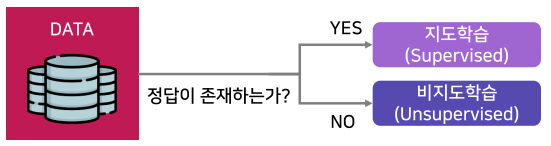
- 비지도 학습 알고리즘: 정답 라벨이 없어 데이터만으로 모델을 학습하고 필요한 정보를 추출하는 알고리즘
- 변환과 군집
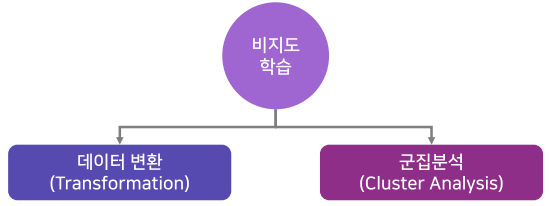
- 데이터 변환(Data Transformation)
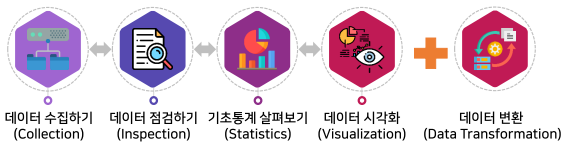
  - 원 데이터보다 쉽게 해석하고 사용할 수 있도록 데이터를 새롭게 표현한 것
  - 원시 데이터를 일반적으로 모델 구축 및 데이터 검색에 더 적합한 형식 또는 구조로 변환하는 프로세스
  - 가장 보편적인 데이터 변환법  
  ① 범주화 (Clipping)  
  ② 개수 축소 (Log Transformation)  
  ③ 데이터 스케일링 (Data Scaling)  
  ④ 차원 축소 (Principal Component Analysis)  
  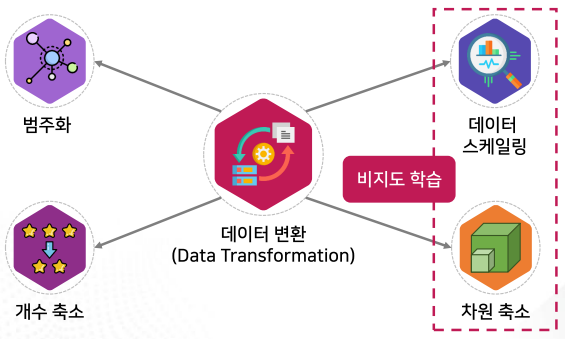
  - 데이터 변환은 무조건 거쳐야 하는 단계는 아님 -> 분석의 특성, 사용하는 알고리즘, 목적에 따라 사용 유무가 정해지기 때문에 주의 필요

# 데이터 스케일링(Data Scaling)
- 데이터 스케일링
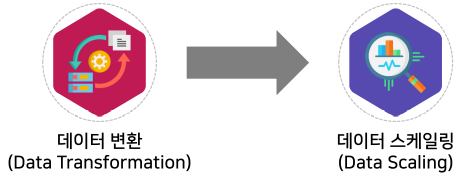
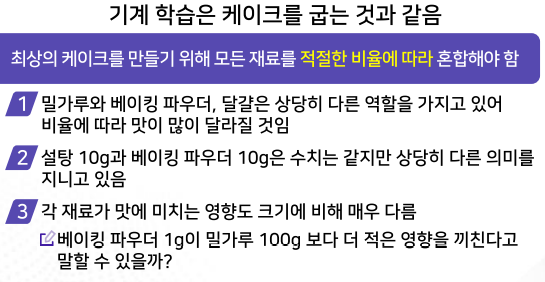
- 데이터 스케일링이 필요한 이유  
① 단위의 제거 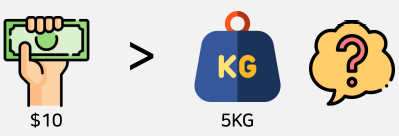
② 수치의 일반화: 모든 특성의 데이터들을 특정 범위의 수(0~1, 0 기준 분산 1 등)로 재계산함으로써 행 내에서의 상대적인 크기만 반영함  
③ 훨씬 빠른 알고리즘 학습 속도: 연산에 많은 리소스가 들어가는 빅데이터 분석이나 딥러닝 알고리즘의 경우 '스케일링은 필수' 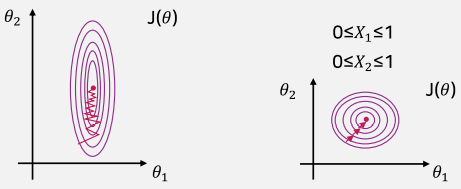
- 데이터 스케일링의 종류
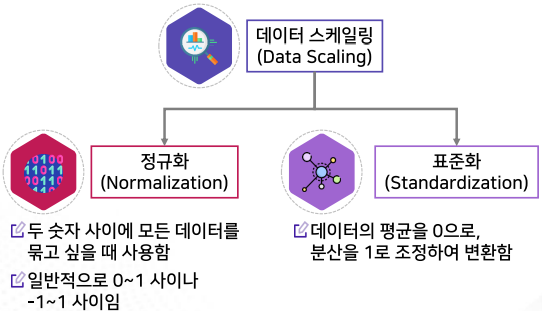
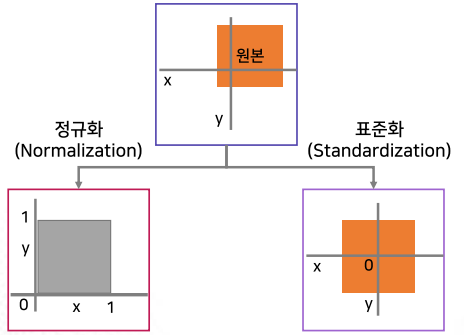
- 많이 사용되는 스케일러들:
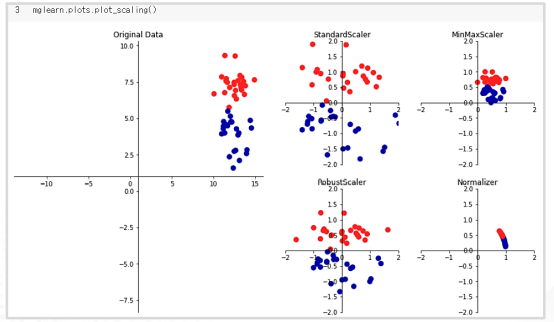
① MinMaxScaler:
  - 가장 대표적인 정규화 스케일러
  - 모든 특성값이 0~1 사이의 값을 가지도록 데이터를 재조명한다.
  - 데이터에 이상치가 있다면 평균과 표준편차에 영향을 미치기 때문에 데이터의 확산이 매우 달라지게 된다.
  - 이상치가 있는 경우 균형 잡힌 척도를 보장할 수 없음
  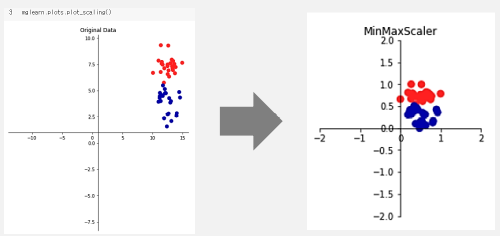  

 ② StandardScaler
  - 가장 대표적이고 표준화된 스케일러
  - 평균을 제거(평균=0)하고 데이터를 단위 분산으로 조정(분산=1)
  - MinMaxScaler와 마찬가지로 이상치에 취약함
  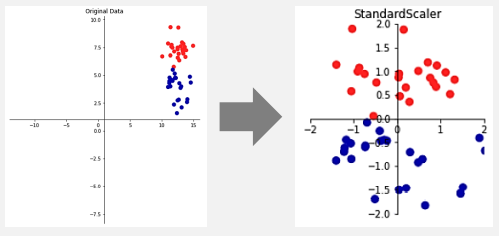  
  
 ③ MaxAbsScaler  
④ RobustScaler  
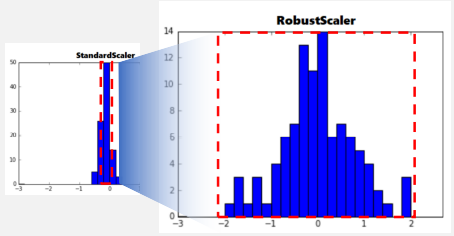  
⑤ Quantile Transformer Scaler(Rank Scaler)  
⑥ Power Transformer Scaler  
⑦ Unit Vector Scaler  

- 원데이터 VS 데이터 스케일러
: 스케이링 이후 겹치는 부분이 많을수록 스케일링이 잘 되었다 할 수 있다.
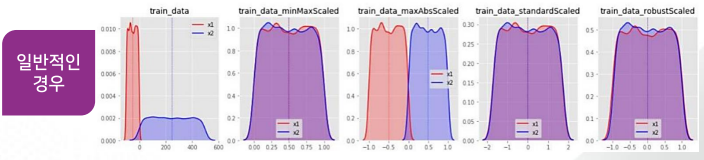
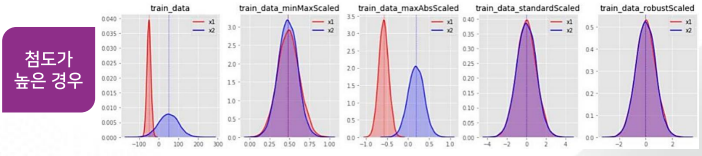
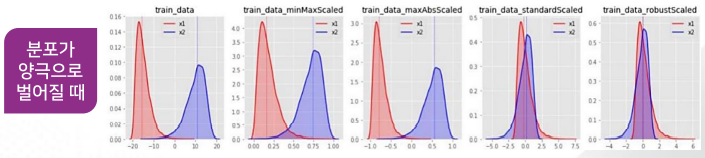
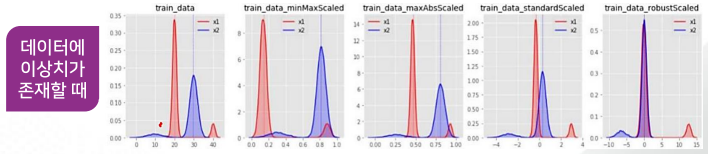
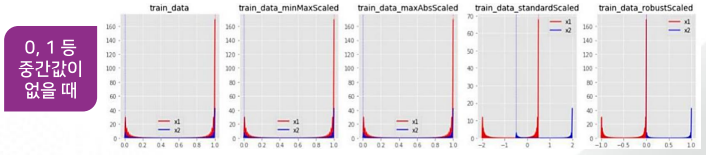

- 데이터 스케일링 총평
  - 각각의 스케일러가 성능이 좋은 상황이 따로 존재한다.
  - 데이터 분석 이전에 분포도와 산점도를 그려서 어떤 스케일러를 활용할지 결정하도록 한다.  
  ex) 이상치 유무, 분포의 차이, 이진 데이터 등
  - Robust Scaler는 대부분 상황에서 가장 잘 작동하나, 많은 수의 표본을 버리게 된다는 단점이 있으므로 유의해서 사용해야 한다. -> Step 2의 다른 단계에서 이상치를 잘 처리했다면 다른 스케일러를 사용하는 것이 좋다.

In [2]:
# 모든 결과물 한꺼번에 display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

# 필요한 모듈을 불러온다
import pandas as pd  
import numpy as np  
from sklearn.svm import SVC  
import matplotlib.pyplot as plt

In [4]:
# sklearn의 데이터셋에서 Breast Cancer 데이터 불러오기
from sklearn.datasets import load_breast_cancer
# breast_cancer() 함수를 통해 데이터를 불러온다
breast_cancer_data = load_breast_cancer()

# sklearn 모듈의 medel_selection 패키지에서 train_test_split 함수를 불러온다
from sklearn.model_selection import train_test_split
# 데이터를 train_set와 test_set으로 나누어 준다
X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer_data.data,
    breast_cancer_data.target,
    test_size=0.2,
    random_state=10)

#### SVC - 스케일링하지 않은 경우

In [7]:
from sklearn.svm import SVC

svc = SVC()

# 알고리즘을 훈련(train)시키기 (X,y)
svc.fit(X_train,y_train)

print("훈련 데이터 점수:", round(svc.score(X_train,y_train),3))
print("테스트 데이터 점수:", round(svc.score(X_test,y_test),3))

SVC()

훈련 데이터 점수: 0.919
테스트 데이터 점수: 0.921


#### 데이터 스케일링 - MinMaxScaler

In [8]:
# MinMaxScaler를 사용해서 데이터 스케일링 해준다
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler를 "scaler"에 할당한다
scaler = MinMaxScaler()

# X의 훈련 데이터를 기준으로 스케일러를 학습시킨다
scaler.fit(X_train)

# X 앞서 훈련시킨 스케일러를 각각 X_train_scaled와 X_test_scaled에 적용한다
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

MinMaxScaler()

In [9]:
# 스케일링한 데이터로 분석한다
from sklearn.svm import SVC

svc = SVC()

# X_train 대신에 스케일링한 훈련 데이터, X_train_scaled가 들어간 것을 볼 수 있다
svc.fit(X_train_scaled,y_train)

print("훈련 데이터 점수:", round(svc.score(X_train_scaled,y_train),3))
print("테스트 데이터 점수:", round(svc.score(X_test_scaled,y_test),3))

SVC()

훈련 데이터 점수: 0.985
테스트 데이터 점수: 0.974


#### Breast_Cancer 데이터를 이용한 SVM 분석을 실시한 결과
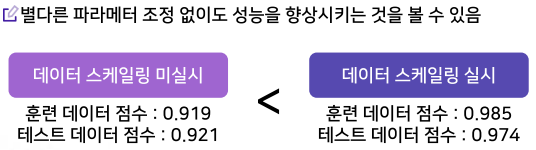